In [1]:
library(tidyverse) 
library(fpp3)
library(rio) 
library(urca)
k <- 1.5
options(repr.plot.width=6*k, repr.plot.height=5*k)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ lubridate   1.9.0     ✔ feasts      0.3.0
✔ tsibble     1.1.3     ✔ fable       0.3.2
✔ tsibbledata 0.4.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks jsonlite::flatten()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble

### ARIMA

In [3]:
m = import('marriages.csv')
m2 = mutate(m, date_round = floor_date(date, unit = 'year'),
            year = year(date_round))
head(m2)

,code,name,total,date,date_round,year
,<int64>,<chr>,<int>,<IDate>,<date>,<dbl>
1,30,Центральный федеральный округ,14845,2006-01-01,2006-01-01,2006
2,30,Центральный федеральный округ,16414,2006-02-01,2006-01-01,2006
3,30,Центральный федеральный округ,15753,2006-03-01,2006-01-01,2006
4,30,Центральный федеральный округ,21803,2006-04-01,2006-01-01,2006
5,30,Центральный федеральный округ,9384,2006-05-01,2006-01-01,2006
6,30,Центральный федеральный округ,29571,2006-06-01,2006-01-01,2006


In [4]:
m3 = select(m2, -date, -date_round)
head(m3)

,code,name,total,year
,<int64>,<chr>,<int>,<dbl>
1,30,Центральный федеральный округ,14845,2006
2,30,Центральный федеральный округ,16414,2006
3,30,Центральный федеральный округ,15753,2006
4,30,Центральный федеральный округ,21803,2006
5,30,Центральный федеральный округ,9384,2006
6,30,Центральный федеральный округ,29571,2006


In [5]:
m_agg = group_by(m3, code, name, year) %>%
    summarise(sum = sum(total),
              max = max(total),
              .groups = 'keep')
m_agg

code,name,year,sum,max
<int64>,<chr>,<dbl>,<int>,<int>
30,Центральный федеральный округ,2006,287557,40480
30,Центральный федеральный округ,2007,328158,42609
30,Центральный федеральный округ,2008,300883,50269
30,Центральный федеральный округ,2009,314089,45051
30,Центральный федеральный округ,2010,311007,45494
30,Центральный федеральный округ,2011,338464,44597
30,Центральный федеральный округ,2012,308879,44401
30,Центральный федеральный округ,2013,317995,49167
30,Центральный федеральный округ,2014,322822,48272


In [6]:
rfy = filter(m_agg, code == 643)

In [7]:
rfy = as_tsibble(rfy, index = year)
rfy

code,name,year,sum,max
<int64>,<chr>,<dbl>,<int>,<int>
643,Российская Федерация,2006,1113664,151116
643,Российская Федерация,2007,1262581,163630
643,Российская Федерация,2008,1178714,192591
643,Российская Федерация,2009,1199440,164684
643,Российская Федерация,2010,1215090,164233
643,Российская Федерация,2011,1316109,168510
643,Российская Федерация,2012,1213616,168085
643,Российская Федерация,2013,1225257,181745
643,Российская Федерация,2014,1205400,176269


In [8]:
train = filter(rfy, year < 2018)

In [9]:
tail(train)

code,name,year,sum,max
<int64>,<chr>,<dbl>,<int>,<int>
643,Российская Федерация,2012,1213616,168085
643,Российская Федерация,2013,1225257,181745
643,Российская Федерация,2014,1205400,176269
643,Российская Федерация,2015,1161044,160667
643,Российская Федерация,2016,985834,138733
643,Российская Федерация,2017,1049725,150368


In [10]:
models = model(train,
             ar1 = ARIMA(sum ~ pdq(1, 0, 0)),
             ma1 = ARIMA(sum ~ pdq(0, 0, 1)),
             naive = NAIVE(sum),
             arma11 = ARIMA(sum ~ pdq(1, 0, 1)),
             arima11 = ARIMA(sum ~ pdq(2, 1, 0)))
models

ar1,ma1,naive,arma11,arima11
<model>,<model>,<model>,<model>,<model>
"<ARIMA(1,0,0) w/ mean>","<ARIMA(0,0,1) w/ mean>",<NAIVE>,"<ARIMA(1,0,1) w/ mean>","<ARIMA(2,1,0)>"


In [11]:
fcst <- forecast(models, h = 4)

In [12]:
accuracy(fcst, rfy)

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ar1,Test,-306492.9,324759.2,306492.9,-38.72332,38.72332,4.280480,3.633562,0.2608191
arima11,Test,-189527.6,211321.9,189527.6,-24.31896,24.31896,2.646943,2.364372,0.2423458
arma11,Test,-302445.3,321088.8,302445.3,-38.23772,38.23772,4.223951,3.592496,0.2599117
ma1,Test,-334470.9,348258.3,334470.9,-41.98675,41.98675,4.671221,3.896482,0.2447697
naive,Test,-216716.0,235928.8,216716.0,-27.62012,27.62012,3.026656,2.639686,0.2039506


`mutate_if()` ignored the following grouping variables:
• Columns `code`, `name`, `year`


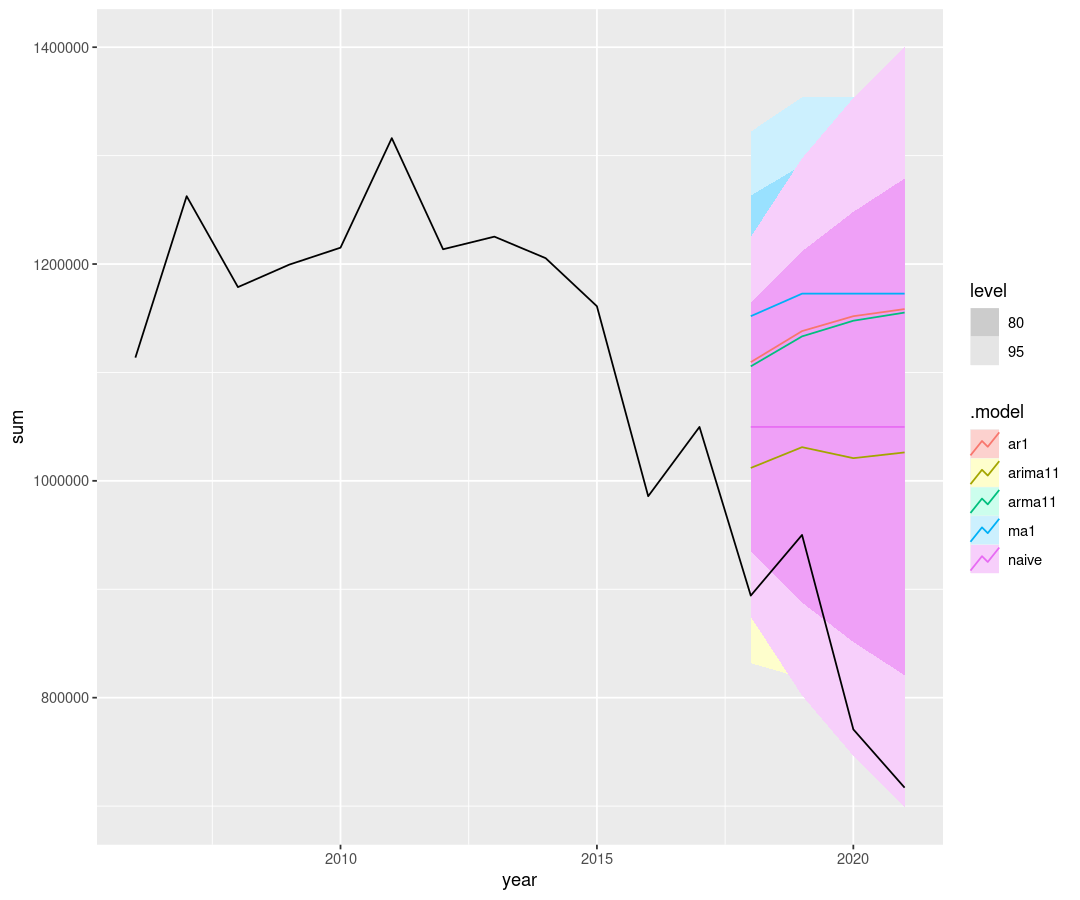

In [13]:
autoplot(fcst, rfy)

### UR

In [14]:
marriages <- as_tsibble(m2, index = date,
                       key = c('code', 'name'))
marr_rf <- filter(marriages, code == 643)

Plot variable not specified, automatically selected `.vars = total`


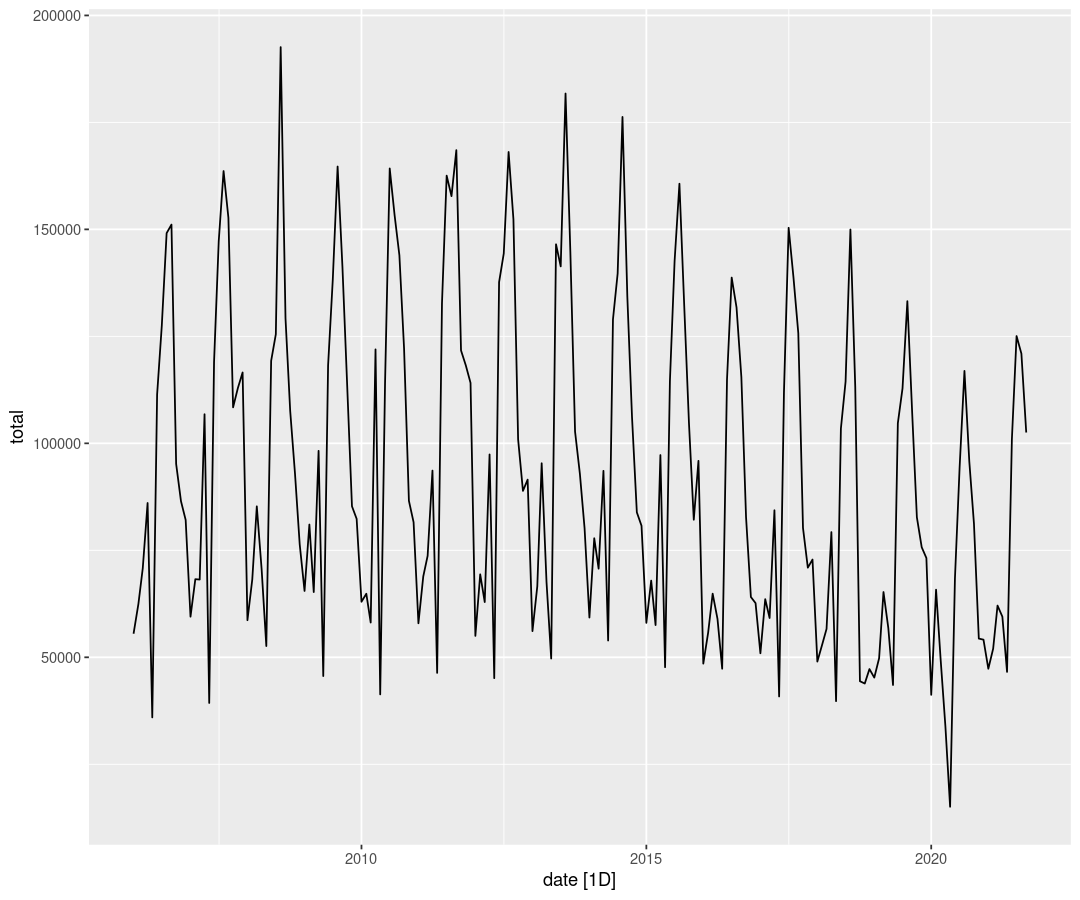

In [15]:
autoplot(marr_rf)

In [17]:
summary(ur.kpss(marr_rf$total, type='mu'))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.5508 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [19]:
summary(ur.df(marr_rf$total, type = 'none'))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-69299 -17772    467  25672  96297 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1    -0.04569    0.02453  -1.863   0.0641 .
z.diff.lag -0.15506    0.07287  -2.128   0.0347 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32960 on 185 degrees of freedom
Multiple R-squared:  0.04987,	Adjusted R-squared:  0.0396 
F-statistic: 4.855 on 2 and 185 DF,  p-value: 0.008809


Value of test-statistic is: -1.8627 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62
